# **Theoretical Question**

Here are the theoretical questions with concise answers:

---

**1. What is a Support Vector Machine (SVM)?**
SVM is a supervised learning algorithm used for classification and regression that finds the optimal hyperplane to separate data points of different classes.

---

**2. What is the difference between Hard Margin and Soft Margin SVM?**

* **Hard Margin:** No misclassification, works only with linearly separable data.
* **Soft Margin:** Allows some misclassifications to improve generalization on non-separable data.

---

**3. What is the mathematical intuition behind SVM?**
SVM maximizes the margin between support vectors of different classes using convex optimization.

---

**4. What is the role of Lagrange Multipliers in SVM?**
They help in solving the constrained optimization problem by converting it into a dual problem.

---

**5. What are Support Vectors in SVM?**
Support vectors are the data points closest to the decision boundary; they define the margin.

---

**6. What is a Support Vector Classifier (SVC)?**
SVC is the SVM model used for classification tasks.

---

**7. What is a Support Vector Regressor (SVR)?**
SVR is the SVM variant used for regression tasks by fitting the best line within a margin of tolerance.

---

**8. What is the Kernel Trick in SVM?**
It maps data into a higher-dimensional space to make it linearly separable without explicitly computing the transformation.

---

**9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel**

* **Linear:** Best for linearly separable data.
* **Polynomial:** Captures interactions of features.
* **RBF:** Handles non-linear relationships using Gaussian function.

---

**10. What is the effect of the C parameter in SVM?**
C controls the trade-off between margin width and classification error; low C allows more margin, high C focuses on minimizing error.

---

**11. What is the role of the Gamma parameter in RBF Kernel SVM?**
Gamma defines how far the influence of a single training point reaches; high gamma overfits, low gamma underfits.

---

**12. What is the Naïve Bayes classifier, and why is it called "Naïve"?**
It is a probabilistic classifier based on Bayes' Theorem, assuming all features are independent (the "naïve" assumption).

---

**13. What is Bayes’ Theorem?**
Bayes’ Theorem:
$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$
It calculates the probability of a hypothesis given observed data.

---

**14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

* **Gaussian:** For continuous data.
* **Multinomial:** For count data (e.g., word counts).
* **Bernoulli:** For binary features.

---

**15. When should you use Gaussian Naïve Bayes over other variants?**
When features are continuous and normally distributed.

---

**16. What are the key assumptions made by Naïve Bayes?**
Features are conditionally independent given the class label.

---

**17. What are the advantages and disadvantages of Naïve Bayes?**

* **Advantages:** Fast, simple, works well with high-dimensional data.
* **Disadvantages:** Assumes feature independence, which rarely holds.

---

**18. Why is Naïve Bayes a good choice for text classification?**
Because it handles high-dimensional, sparse data well and is computationally efficient.

---

**19. Compare SVM and Naïve Bayes for classification tasks**

* **SVM:** Better for complex boundaries, slower on large datasets.
* **Naïve Bayes:** Faster, less accurate on complex patterns.

---

**20. How does Laplace Smoothing help in Naïve Bayes?**
It prevents zero probability for unseen features by adding a small constant to all counts.

---


In [1]:
## Practical Questions

In [2]:
# 1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Iris SVM Accuracy:", accuracy_score(y_test, y_pred))


Iris SVM Accuracy: 1.0


In [3]:
# 2. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = SVC(kernel='linear')
rbf_model = SVC(kernel='rbf')

linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

linear_acc = accuracy_score(y_test, linear_model.predict(X_test))
rbf_acc = accuracy_score(y_test, rbf_model.predict(X_test))

print("Linear Kernel Accuracy:", linear_acc)
print("RBF Kernel Accuracy:", rbf_acc)


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [4]:
# 3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVR Mean Squared Error:", mean_squared_error(y_test, y_pred))


SVR Mean Squared Error: 1.3320115421348744


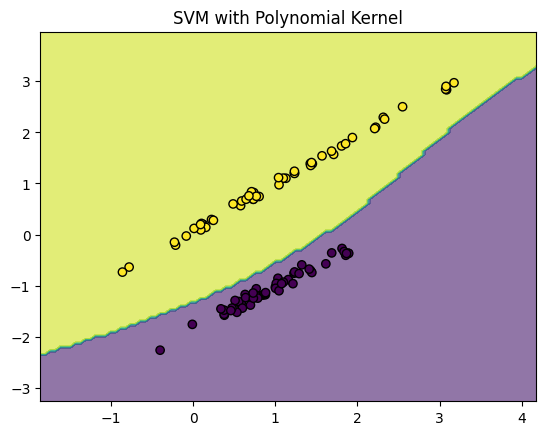

In [5]:
# 4. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC(kernel='poly', degree=3)
model.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SVM with Polynomial Kernel")
plt.show()


In [6]:
# 5. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gaussian NB Accuracy on Breast Cancer dataset:", accuracy_score(y_test, y_pred))


Gaussian NB Accuracy on Breast Cancer dataset: 0.9736842105263158


In [7]:
# 6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X, y = data.data, data.target

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Multinomial NB Accuracy on 20 Newsgroups:", accuracy_score(y_test, y_pred))


Multinomial NB Accuracy on 20 Newsgroups: 0.8503978779840848


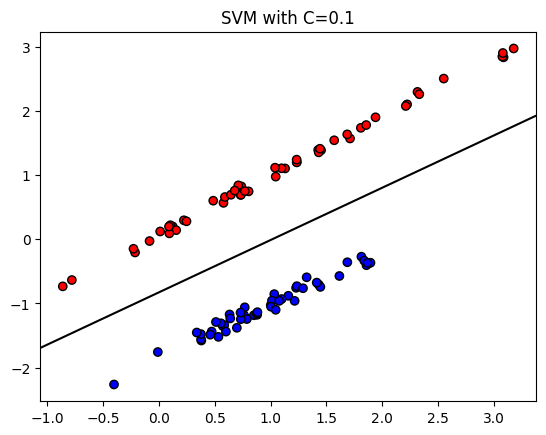

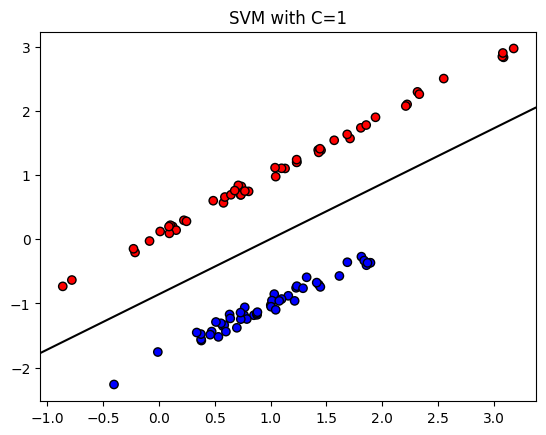

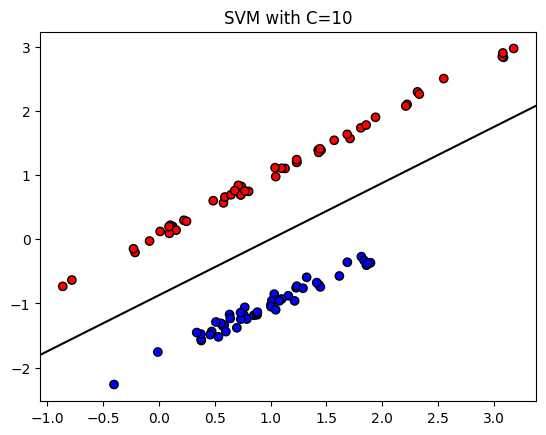

In [8]:
# 7. Train an SVM Classifier with different C values and compare the decision boundaries visually

from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
Cs = [0.1, 1, 10]

for C in Cs:
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    plt.figure()
    plt.title(f"SVM with C={C}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 30), np.linspace(*ylim, 30))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
    plt.show()


In [9]:
# 8. Train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_features=10, n_informative=5, n_redundant=0, random_state=42)
X = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Bernoulli NB Accuracy:", accuracy_score(y_test, y_pred))


Bernoulli NB Accuracy: 0.85


In [10]:
# 9. Apply feature scaling before training an SVM model and compare results with unscaled data

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
unscaled_score = model_unscaled.score(X_test, y_test)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)

model_scaled = SVC()
model_scaled.fit(X_train_s, y_train)
scaled_score = model_scaled.score(X_test_s, y_test)

print("Unscaled Accuracy:", unscaled_score)
print("Scaled Accuracy:", scaled_score)


Unscaled Accuracy: 0.9736842105263158
Scaled Accuracy: 0.9473684210526315


In [11]:
# 10. Train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GaussianNB()
model.fit(X_train, y_train)
print("GaussianNB Accuracy:", model.score(X_test, y_test))  # Laplace smoothing not applicable in GaussianNB


GaussianNB Accuracy: 1.0


In [12]:
# 11. Train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy: 1.0


In [14]:
# 12 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy without class weight: {acc_no_weight:.4f}")
print(f"Accuracy with class weight balanced: {acc_weighted:.4f}")
print("\nClassification Report with class weight:")
print(classification_report(y_test, y_pred_weighted))



Accuracy without class weight: 1.0000
Accuracy with class weight balanced: 1.0000

Classification Report with class weight:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00        25

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [29]:
# 13= Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

X = data['message']
y = data['label_num']

tfidf = TfidfVectorizer(stop_words='english')
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9794

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
# 14 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")


SVM Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000


In [17]:
# 15 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_full = nb.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

selector = SelectKBest(score_func=chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with all features: {acc_full:.4f}")
print(f"Accuracy with selected features: {acc_selected:.4f}")


Accuracy with all features: 1.0000
Accuracy with selected features: 1.0000


In [18]:
# 16 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr.fit(X_train, y_train)
y_pred_ovr = ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo.fit(X_train, y_train)
y_pred_ovo = ovo.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OvR Accuracy: {acc_ovr:.4f}")
print(f"OvO Accuracy: {acc_ovo:.4f}")


OvR Accuracy: 1.0000
OvO Accuracy: 1.0000


In [19]:
# 17 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{kernel.capitalize()} kernel accuracy: {acc:.4f}")


Linear kernel accuracy: 0.9561
Poly kernel accuracy: 0.9474
Rbf kernel accuracy: 0.9474


In [20]:
# 18 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data.data, data.target

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

print(f"Average Stratified K-Fold Accuracy: {np.mean(accuracies):.4f}")


Average Stratified K-Fold Accuracy: 0.9667


In [21]:
# 19 Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

priors_list = [
    None,  # default priors from data
    [0.5, 0.25, 0.25],
    [0.33, 0.33, 0.34]
]

for priors in priors_list:
    nb = GaussianNB(priors=priors)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Priors: {priors} -> Accuracy: {acc:.4f}")


Priors: None -> Accuracy: 1.0000
Priors: [0.5, 0.25, 0.25] -> Accuracy: 1.0000
Priors: [0.33, 0.33, 0.34] -> Accuracy: 1.0000


In [22]:
# 20 Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_full = svm.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

selector = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=2)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy with all features: {acc_full:.4f}")
print(f"Accuracy with RFE-selected features: {acc_rfe:.4f}")


Accuracy with all features: 1.0000
Accuracy with RFE-selected features: 1.0000


In [23]:
# 21 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [24]:
# 22 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)

loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.0263


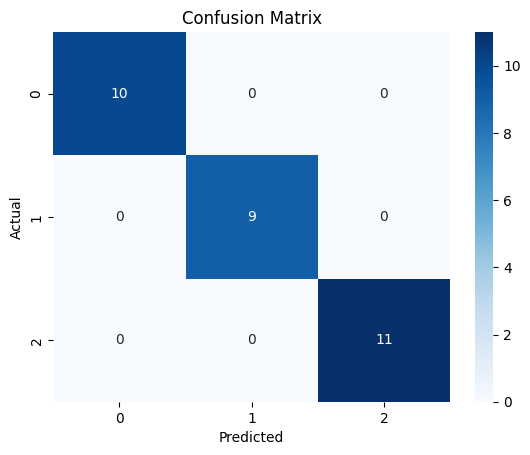

In [25]:
# 23 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# 24= Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.8600


In [27]:
# 25 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9984


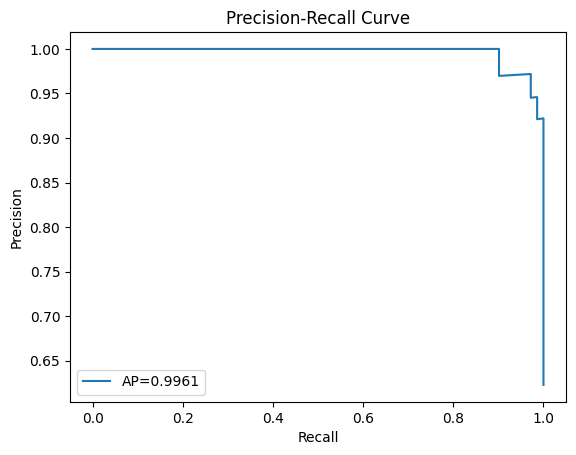

In [28]:
# 26 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_scores = svm.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.plot(recall, precision, label=f'AP={avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
